In [2]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
# 获取基站的位置
bs_file = r'./7个4.9G站点.xlsx'
df = pd.read_excel(bs_file)

pos = []
row, col = df.shape
for i in range(row):
    pos.append((df.iloc[i]['纬度'], df.iloc[i]['经度']))


# 使用set去除重复项，然后转换回NumPy数组
pos = np.array(list(map(tuple, set(pos))))

print(len(pos))

7


,KeyID,Altitude,Longitude,Latitude,Speed,NR Band,NR PCI,SS-RSRP,SS-SINR,NR PHY Throughput DL(Mbps),...,NR MAC Throughput UL(Mbps),NR UL Grant Count,NR PUSCH BLER,NR UL Avg MCS,PRB Num UL/slot,NR UL Avg RI,NR PUSCH Txpower,NR SRS Txpower,Ping Delay,Ping Jitter
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.0,1482.000000,1482.000000,1482.000000,1482.000000,...,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.0,1482.000000,1482.000000,0.0,0.0
mean,1089.755735,121.234818,119.841649,31.714625,44.191323,79.0,119.706478,-73.953711,8.047969,448.840486,...,128.822868,572.686235,9.879372,23.868873,245.492186,1.0,17.917679,22.162618,NaN,NaN
std,726.020002,2.300850,0.004501,0.004692,18.821331,0.0,81.290641,5.076827,5.968177,113.989301,...,19.534017,32.212968,2.972387,2.346090,5.128148,0.0,2.940090,4.325997,NaN,NaN
min,139.000000,117.000000,119.830930,31.703180,0.000000,79.0,26.000000,-91.660000,-8.760000,60.690000,...,20.940000,102.000000,0.000000,13.570000,120.950000,1.0,5.000000,5.000000,NaN,NaN
25%,516.250000,119.000000,119.839520,31.711832,37.105000,79.0,56.000000,-76.955000,4.385000,376.535000,...,114.942500,550.000000,9.302500,22.420000,246.000000,1.0,17.000000,19.000000,NaN,NaN
50%,925.500000,121.000000,119.841085,31.714760,48.230000,79.0,82.000000,-74.105000,7.625000,463.055000,...,132.945000,600.000000,10.255000,24.900000,246.000000,1.0,19.000000,25.000000,NaN,NaN
75%,1319.750000,123.000000,119.844690,31.717545,59.227500,79.0,159.000000,-70.542500,11.220000,540.835000,...,143.815000,600.000000,11.220000,25.907500,246.000000,1.0,19.000000,25.000000,NaN,NaN
max,2694.000000,125.000000,119.851570,31.723500,69.890000,79.0,302.000000,-60.360000,25.610000,668.750000,...,166.850000,600.000000,25.920000,26.760000,246.000000,1.0,23.000000,26.000000,NaN,NaN


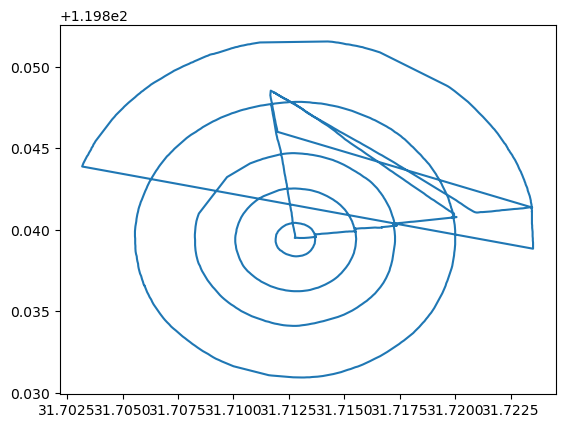

In [3]:
file1 = r'.\7.4.2多层窄波束配置--蜂窝三扇区组网\7.4.2多层窄波束配置--蜂窝三扇区组网-1km站间距-飞行高度100米-加扰50%.csv'
df_100 = pd.read_csv(file1)
# print(df_100)
filtered_df = df_100[(df_100['Altitude'] >= 117) & (df_100['Altitude'] <= 125)]
# print(filtered_df.shape)

info_ue = filtered_df[['Latitude', 'Longitude', 'SS-SINR']].values
# print(type(info_ue))
# print(info_ue.shape)
plt.plot(info_ue[:, 0], info_ue[:, 1])
filtered_df.describe()

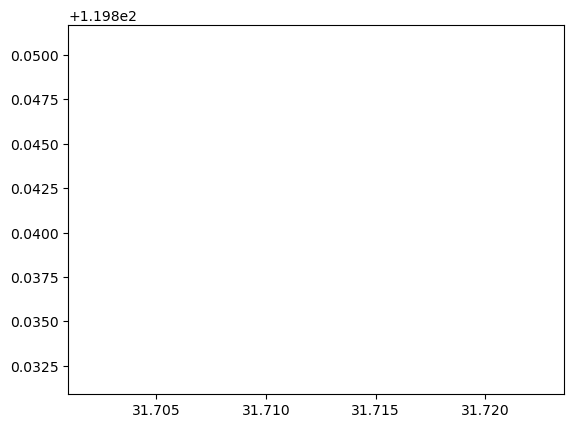

In [4]:
from matplotlib.animation import FuncAnimation

# 假设你已经有一组给定的数组 x 和 y
# 示例数据：随机生成一组数据
x = info_ue[:, 0]  # 生成 0 到 10 之间的 100 个点
y = info_ue[:, 1]  # 计算这些点的正弦值

# 初始化空的图形和轴
fig, ax = plt.subplots()
points, = ax.plot([], [], 'bo')  # 初始时没有点，'bo'表示蓝色圆点

# 初始化函数，用于设置图形的初始状态
def init():
    ax.set_xlim(31.703180, 31.723500)  # x 轴范围
    ax.set_ylim(119.8309, 119.8517)  # y 轴范围
    return points,

# 更新函数，每次更新图形时调用
def update(frame):
    index = frame  # 每次更新按顺序取下一个点
    if index < len(x):
        points.set_data(x[index], y[index])  # 设置点的位置
    return points,

# 创建动画，interval 控制每隔多少毫秒更新一次
ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=1)
plt.show()